### Importamos librerias

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Leemos datos 

In [2]:
df = pd.read_csv("./DatosCovid.csv")
df.head()

,FECHA_INGRESO,EDAD
0,2020-06-18,43
1,2020-06-12,56
2,2020-06-18,40
3,2020-03-29,67
4,2020-06-02,58


### Verificamos si hay datos faltantes

In [3]:
df.isnull().sum()

FECHA_INGRESO    0
EDAD             0
dtype: int64

In [4]:
df['FECHA_INGRESO'] = pd.to_datetime(df.FECHA_INGRESO, format='%Y-%m-%d')

In [5]:
df.head()

,FECHA_INGRESO,EDAD
0,2020-06-18,43
1,2020-06-12,56
2,2020-06-18,40
3,2020-03-29,67
4,2020-06-02,58


### Filtramos aquellos datos que son del año 2020

In [6]:
df = df[df["FECHA_INGRESO"]<"2021-01-01"]
df.head()

,FECHA_INGRESO,EDAD
0,2020-06-18,43
1,2020-06-12,56
2,2020-06-18,40
3,2020-03-29,67
4,2020-06-02,58


### Sacamos cuantas personas ingresaron a un hospital cada dia del año

In [7]:
group=df.groupby(["FECHA_INGRESO"])
frecuencia= group.size().reset_index(name='frecuencia')
print(frecuencia)

    FECHA_INGRESO  frecuencia
0      2020-01-01          37
1      2020-01-02         129
2      2020-01-03         211
3      2020-01-04          81
4      2020-01-05         138
..            ...         ...
361    2020-12-27        8249
362    2020-12-28       42012
363    2020-12-29       42246
364    2020-12-30       40568
365    2020-12-31       31846

[366 rows x 2 columns]


### Separamos mes y dia del año para graficar y ademas porque sabemos que todos son del 2020

In [8]:
frecuencia['mes-y-dia'] = frecuencia['FECHA_INGRESO'].dt.strftime('%m-%d')

In [9]:
print(frecuencia)

    FECHA_INGRESO  frecuencia mes-y-dia
0      2020-01-01          37     01-01
1      2020-01-02         129     01-02
2      2020-01-03         211     01-03
3      2020-01-04          81     01-04
4      2020-01-05         138     01-05
..            ...         ...       ...
361    2020-12-27        8249     12-27
362    2020-12-28       42012     12-28
363    2020-12-29       42246     12-29
364    2020-12-30       40568     12-30
365    2020-12-31       31846     12-31

[366 rows x 3 columns]


### Obtenemos el numero mayor de ingresos en ese año

In [10]:
Max= max(frecuencia["frecuencia"])
print(Max)

42246


### Podemos ver que el dia en donde mas personas fueron ingresadas a un hospital en el año 2020 fue el 29 de Diciembre  con 42,246

### Sacamos los dias donde los ingresos a hospitales fueron mayor a 40,000 y graficamos

    FECHA_INGRESO  frecuencia mes-y-dia
362    2020-12-28       42012     12-28
363    2020-12-29       42246     12-29
364    2020-12-30       40568     12-30


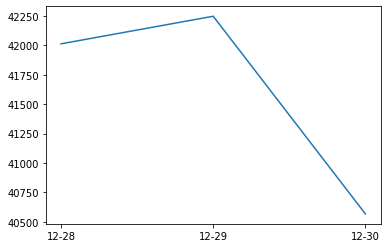

In [11]:
frecuencia = frecuencia[frecuencia["frecuencia"]>40000]
print(frecuencia)
x=frecuencia['mes-y-dia']
y= frecuencia['frecuencia']

plt.plot(x,y)

## Podemos los mayores numeros de ingresos a hospitales fueron 28,29 y 30 de Diciembre del 2020